In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-crash-dataset/new dataset.xlsx
/kaggle/input/car-crash-dataset/monroe county car crach 2003-2015.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

In [3]:
#df = pd.read_csv("")
df = pd.read_csv("/kaggle/input/car-crash-dataset/monroe county car crach 2003-2015.csv", encoding='ISO-8859-1')


In [4]:
pip install chardet

  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import chardet

with open('/kaggle/input/car-crash-dataset/monroe county car crach 2003-2015.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Now use this detected encoding in pd.read_csv()
df = pd.read_csv("/kaggle/input/car-crash-dataset/monroe county car crach 2003-2015.csv", encoding=encoding)

In [6]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [7]:
df.duplicated().sum()

64

In [8]:
df = df.drop_duplicates()
print(df.shape)

(53879, 11)


In [9]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [10]:
df = df.dropna()
df.isna().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

In [11]:
print(df.shape)

(52520, 11)


In [12]:
df["Hour"].head(10)

0       0.0
1    1500.0
2    2300.0
3     900.0
4    1100.0
5    1800.0
6    1200.0
7    1400.0
8    1400.0
9    1600.0
Name: Hour, dtype: float64

In [13]:
def convert_float_to_time(time_float):
    
    time_str = str(time_float).replace('.0', '').zfill(4)
    
    hours = time_str[:-2]
    minutes = time_str[-2:]
    
    return f"{hours}:{minutes}"

In [14]:
df['Hour'] = df['Hour'].apply(convert_float_to_time)
df["Hour"].head(10)

0    00:00
1    15:00
2    23:00
3    09:00
4    11:00
5    18:00
6    12:00
7    14:00
8    14:00
9    16:00
Name: Hour, dtype: object

In [15]:
df["Collision Type"].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle'], dtype=object)

In [16]:
df["Collision Type"].value_counts()

Collision Type
2-Car               36503
1-Car               10012
3+ Cars              3104
Moped/Motorcycle      999
Bus                   840
Pedestrian            599
Cyclist               463
Name: count, dtype: int64

In [17]:
df["Injury Type"].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

In [18]:
df["Injury Type"].value_counts()

Injury Type
No injury/unknown     40298
Non-incapacitating    11031
Incapacitating         1076
Fatal                   115
Name: count, dtype: int64

In [19]:
# Mapping numerical month to month, day to day names
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])
df["Day"]=df["Day"]-1
df['Day'] = df['Day'].apply(lambda x: calendar.day_name[int(x)])

In [20]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,January,Friday,Weekday,00:00,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,January,Saturday,Weekday,15:00,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,January,Saturday,Weekend,23:00,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,January,Sunday,Weekend,09:00,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,January,Sunday,Weekend,11:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [21]:
# Rename column name and correct weekday weekend seperation
df = df.rename(columns={'Weekend?': 'Is_Weekend'})
def get_weekend(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
df['Is_Weekend'] = df['Day'].apply(get_weekend)
df.head()

,Year,Month,Day,Is_Weekend,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,January,Friday,Weekday,00:00,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,January,Saturday,Weekend,15:00,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,January,Saturday,Weekend,23:00,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,January,Sunday,Weekend,09:00,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,January,Sunday,Weekend,11:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


Text(0.5, 1.0, 'Type of Accidents')

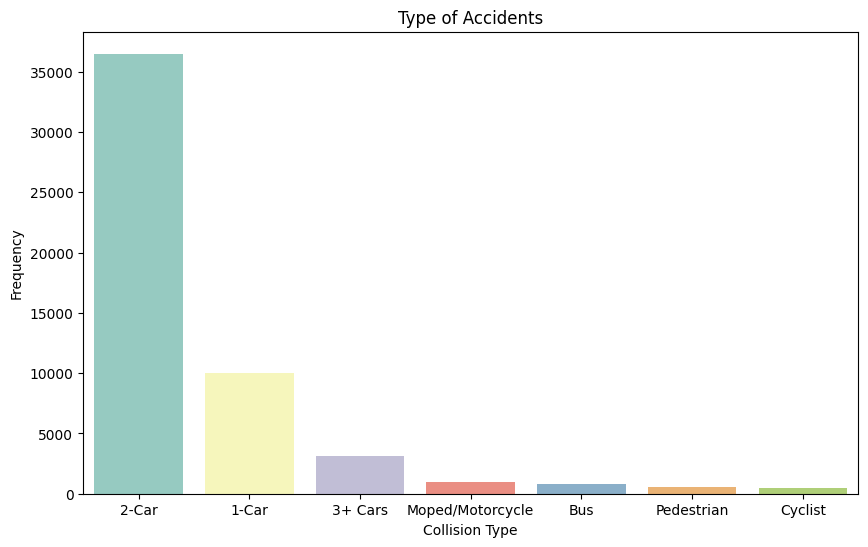

In [22]:
# Data Visualization
plt.figure(figsize=(10, 6))
order = df['Collision Type'].value_counts().index 
sns.countplot(x=df['Collision Type'],palette='Set3',order=order)
plt.ylabel('Frequency')
plt.title('Type of Accidents')

Text(0.5, 1.0, 'Number of Accidents')

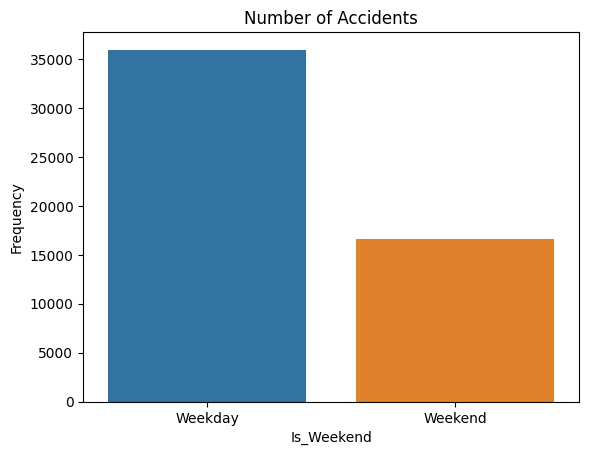

In [23]:
sns.countplot(data=df, x=df["Is_Weekend"])
plt.ylabel("Frequency")
plt.title("Number of Accidents")

In [24]:
df["Primary Factor"].nunique()

55

In [25]:
factor_graph=df["Primary Factor"].value_counts()
factor_graph.head(10)

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11168
FOLLOWING TOO CLOSELY                        7336
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6064
UNSAFE BACKING                               5161
RAN OFF ROAD RIGHT                           2916
DISREGARD SIGNAL/REG SIGN                    2201
SPEED TOO FAST FOR WEATHER CONDITIONS        1907
IMPROPER TURNING                             1836
ANIMAL/OBJECT IN ROADWAY                     1682
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1652
Name: count, dtype: int64

In [26]:
filtered_factors = factor_graph[factor_graph > 1000]

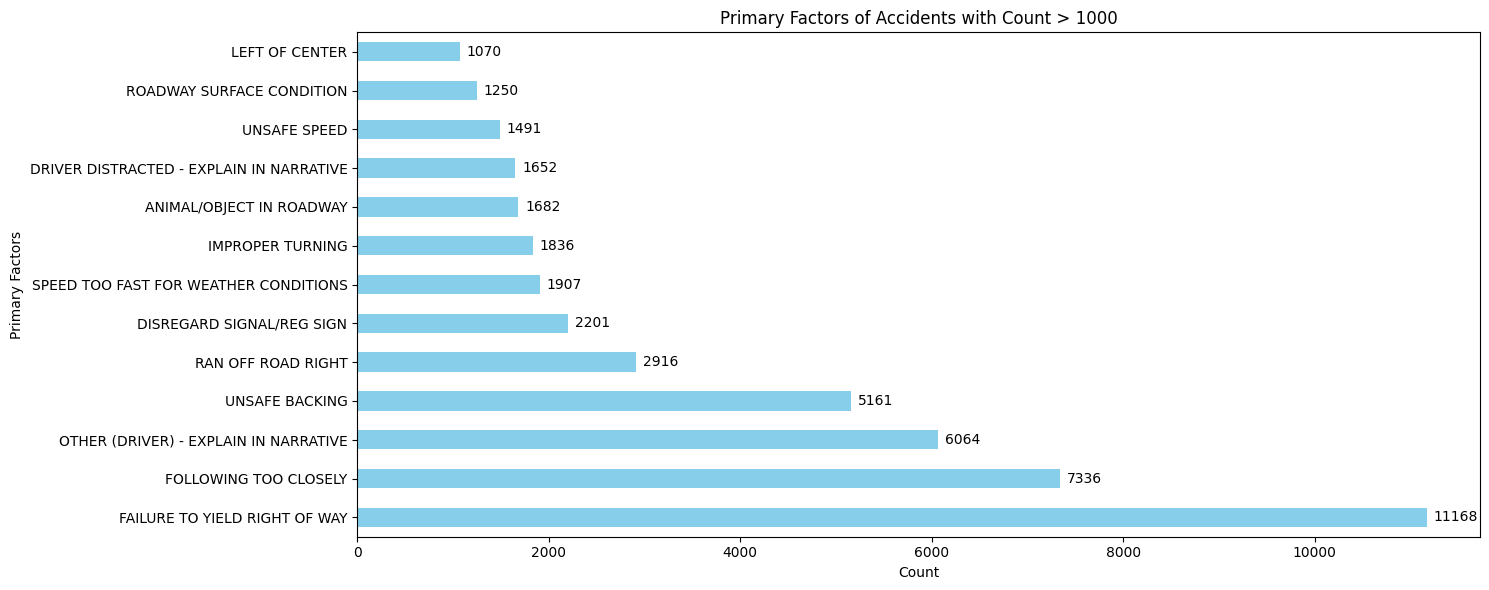

In [27]:
plt.figure(figsize=(15, 6))
bars = filtered_factors.plot(kind='barh',color="skyblue")
for bar in bars.patches:
    plt.annotate(str(bar.get_width()), 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', xytext=(5, 0), 
                 textcoords='offset points')

plt.xlabel('Count')
plt.ylabel('Primary Factors')
plt.title('Primary Factors of Accidents with Count > 1000')
plt.tight_layout()
plt.show()

In [28]:
## Creating new DataFrame
weekday_counts = df['Day'].value_counts().reset_index()
weekday_counts.columns = ['Weekday', 'Accident Count']
weekday_counts

,Weekday,Accident Count
0,Saturday,9434
1,Wednesday,7952
2,Friday,7916
3,Thursday,7697
4,Tuesday,7282
5,Sunday,7151
6,Monday,5088


In [29]:
# Define the correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [30]:
weekday_counts['Weekday'] = pd.Categorical(weekday_counts['Weekday'], categories=weekday_order, ordered=True)
weekday_counts = weekday_counts.sort_values('Weekday')
weekday_counts

,Weekday,Accident Count
6,Monday,5088
4,Tuesday,7282
1,Wednesday,7952
3,Thursday,7697
2,Friday,7916
0,Saturday,9434
5,Sunday,7151


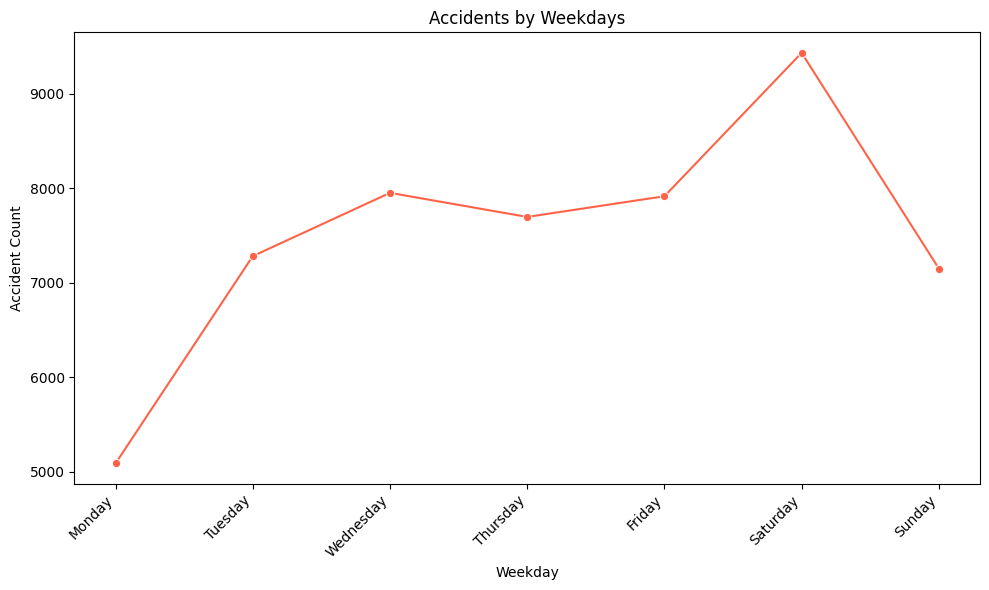

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Weekday', y='Accident Count', data=weekday_counts, sort=False, marker='o',color="tomato")
plt.xlabel('Weekday')
plt.ylabel('Accident Count')
plt.title('Accidents by Weekdays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

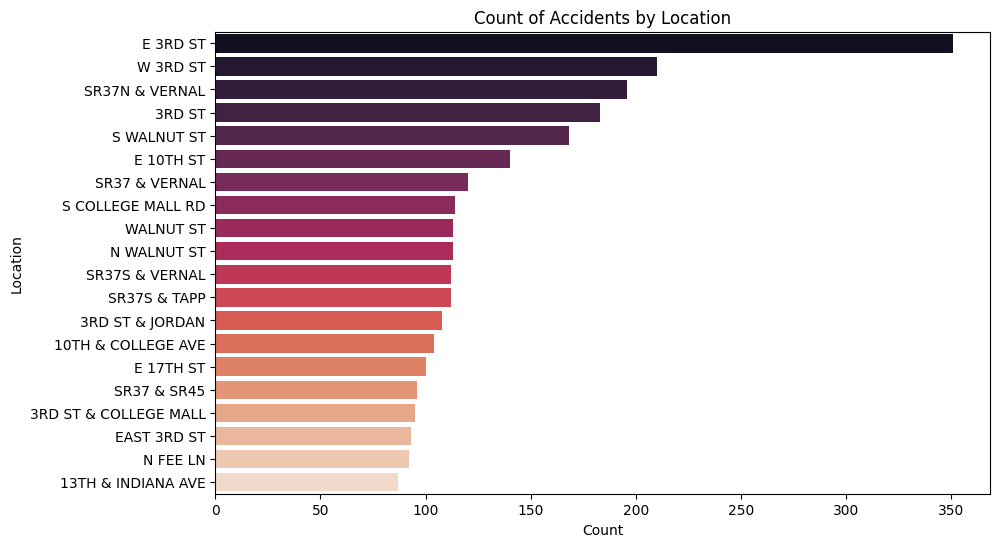

In [32]:
loc_acc=df['Reported_Location'].value_counts().head(20).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="count",y="Reported_Location",data=loc_acc,palette="rocket")
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Count of Accidents by Location")
plt.show()

In [33]:
injury_counts = df['Injury Type'].value_counts()
injury_counts

Injury Type
No injury/unknown     40298
Non-incapacitating    11031
Incapacitating         1076
Fatal                   115
Name: count, dtype: int64

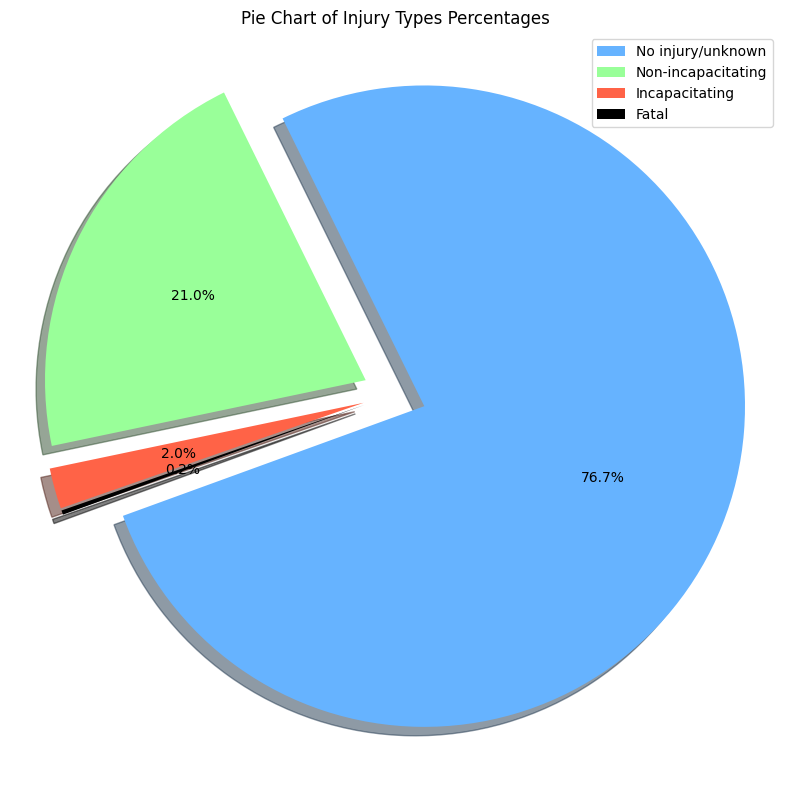

In [34]:
custom_colors = ['#66b3ff', '#99ff99', 'tomato', 'black']
plt.figure(figsize=(8, 8))
plt.pie(injury_counts, labels=injury_counts.index, autopct='%1.1f%%', startangle=200, colors=custom_colors,labeldistance=None,explode=(0.1,0.1,0.1,0.1),shadow=True)
plt.title('Pie Chart of Injury Types Percentages')
plt.axis('equal')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [35]:
df['Hour'] = pd.to_datetime(df['Hour'], format='%H:%M') #Converting 'Hour' column to datetime format

In [36]:
accidents_per_hour = df['Hour'].dt.strftime('%H:%M').value_counts().sort_index()

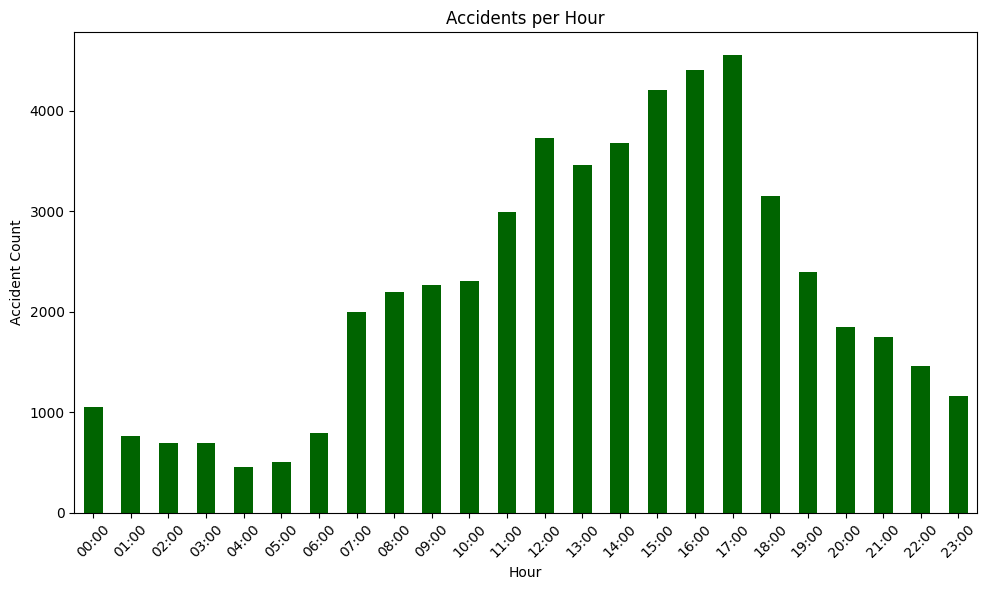

In [37]:
# Plotting
plt.figure(figsize=(10, 6))
accidents_per_hour.plot(kind='bar', color='darkgreen')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.title('Accidents per Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

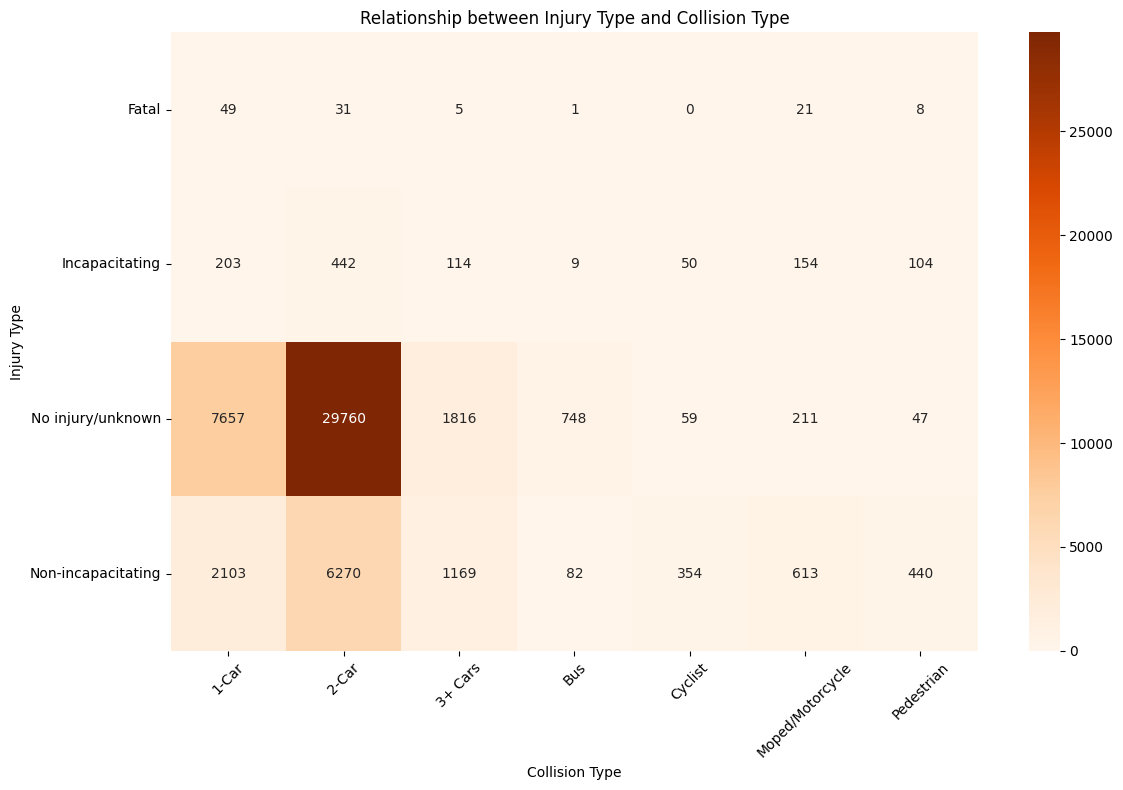

In [38]:
#Heatmap for Injury Type vs Collision Type Crosstab

cross_tab = pd.crosstab(df['Injury Type'], df['Collision Type'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='Oranges', fmt='d')
plt.xlabel('Collision Type')
plt.ylabel('Injury Type')
plt.title('Relationship between Injury Type and Collision Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()